# Experimento 6: classificação com KNN

Experimentando 30 rodadas de classificação com KNN com

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (classification_report,
                             plot_confusion_matrix,
                             confusion_matrix,
                             accuracy_score)

In [2]:
def acuracia_por_frequencia(
        frequence:np.ndarray,
        y_true:np.ndarray,
        y_pred:np.ndarray,
        rodada : int = 0
    )->pd.DataFrame:
    
    df = pd.DataFrame(
        data=[frequence, y_true, y_pred],
        index=['freq', 'true', 'pred']
        ).transpose()

    score_dict = {}

    for freq, sub_df in df.groupby('freq'):
        score_dict[f'freq_{freq}_support'] = len(sub_df)
        score_dict[f'freq_{freq}_acc'] = accuracy_score(y_true=sub_df['true'].values,
                                                        y_pred=sub_df['pred'].values)
    return pd.DataFrame(score_dict, index=[rodada])


## Carregando dados

seeds: [6795 2086  642 3595 3930 1152 3163 6632 6543  112 4825 1818 4298 3945
 4858 3023 6042 4260  772 1010 3662 7907 5949 5826 7527  873 5471 6811
 5389 2138]
Rodada: 0 - seed: 6795

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       0.94      0.95      0.94        79
        HI-2       0.99      0.99      0.99        86
        HI-3       1.00      0.99      0.99        84
        LI-1       0.91      0.91      0.91        54
        LI-2       1.00      1.00      1.00        73
        LI-3       1.00      1.00      1.00        75

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



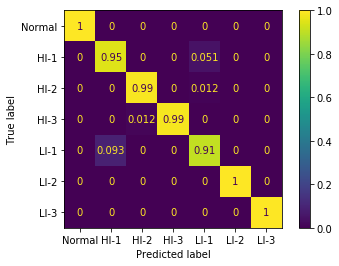

Rodada: 1 - seed: 2086

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        65
        HI-1       0.96      0.99      0.98        80
        HI-2       1.00      0.98      0.99        91
        HI-3       1.00      0.99      0.99        75
        LI-1       0.97      0.96      0.97        79
        LI-2       0.97      1.00      0.98        62
        LI-3       1.00      1.00      1.00        67

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



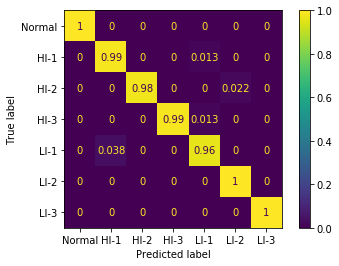

Rodada: 2 - seed: 642

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        70
        HI-1       0.96      0.96      0.96        77
        HI-2       0.99      0.96      0.97        79
        HI-3       1.00      0.99      0.99        76
        LI-1       0.93      0.97      0.95        65
        LI-2       1.00      1.00      1.00        75
        LI-3       1.00      1.00      1.00        77

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



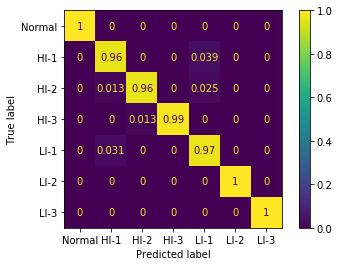

Rodada: 3 - seed: 3595

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       0.96      0.97      0.96        68
        HI-2       1.00      0.97      0.99        75
        HI-3       1.00      1.00      1.00        83
        LI-1       0.95      0.96      0.95        75
        LI-2       1.00      1.00      1.00        71
        LI-3       1.00      1.00      1.00        79

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



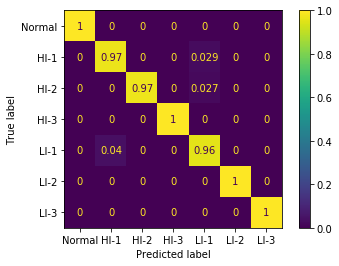

Rodada: 4 - seed: 3930

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        66
        HI-1       0.97      0.94      0.96        80
        HI-2       1.00      1.00      1.00        69
        HI-3       1.00      0.99      0.99        71
        LI-1       0.95      0.98      0.96        91
        LI-2       1.00      1.00      1.00        72
        LI-3       1.00      1.00      1.00        70

    accuracy                           0.98       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.98      0.98      0.98       519



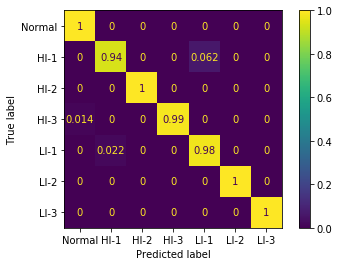

Rodada: 5 - seed: 1152

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        75
        HI-1       0.91      0.97      0.94        71
        HI-2       1.00      0.97      0.99        73
        HI-3       0.99      0.99      0.99        76
        LI-1       0.96      0.92      0.94        83
        LI-2       1.00      1.00      1.00        70
        LI-3       1.00      1.00      1.00        71

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



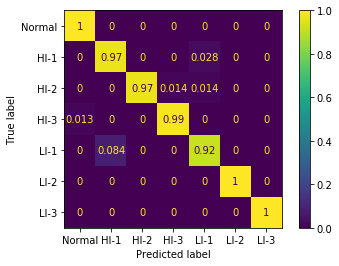

Rodada: 6 - seed: 3163

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        73
        HI-1       0.96      0.90      0.93        77
        HI-2       1.00      0.95      0.97        74
        HI-3       0.99      0.99      0.99        80
        LI-1       0.89      0.96      0.93        79
        LI-2       0.96      1.00      0.98        69
        LI-3       1.00      1.00      1.00        67

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



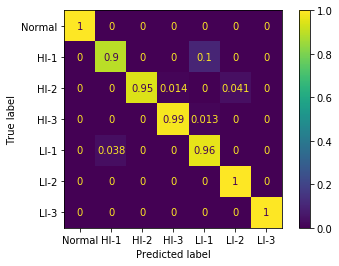

Rodada: 7 - seed: 6632

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       0.93      0.96      0.94        78
        HI-2       0.99      1.00      0.99        74
        HI-3       1.00      0.99      0.99        75
        LI-1       0.96      0.92      0.94        74
        LI-2       1.00      1.00      1.00        83
        LI-3       1.00      1.00      1.00        67

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



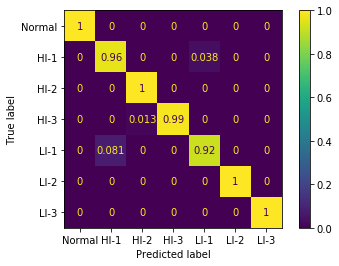

Rodada: 8 - seed: 6543

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        80
        HI-1       0.96      0.98      0.97        82
        HI-2       1.00      1.00      1.00        69
        HI-3       1.00      0.99      0.99        77
        LI-1       0.96      0.96      0.96        74
        LI-2       1.00      1.00      1.00        68
        LI-3       1.00      1.00      1.00        69

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



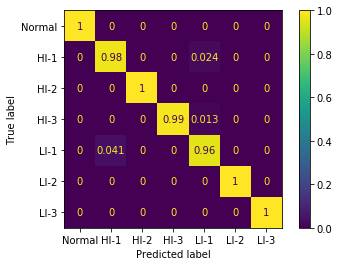

Rodada: 9 - seed: 112

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        67
        HI-1       0.95      0.98      0.96        81
        HI-2       0.99      0.97      0.98        74
        HI-3       1.00      0.99      0.99        76
        LI-1       0.95      0.95      0.95        83
        LI-2       1.00      1.00      1.00        68
        LI-3       1.00      1.00      1.00        70

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



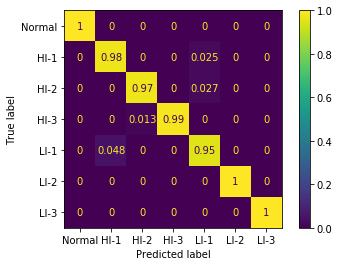

Rodada: 10 - seed: 4825

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        66
        HI-1       0.98      0.98      0.98        83
        HI-2       1.00      0.98      0.99        63
        HI-3       0.99      0.99      0.99        82
        LI-1       0.98      0.98      0.98       102
        LI-2       1.00      1.00      1.00        60
        LI-3       1.00      1.00      1.00        63

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



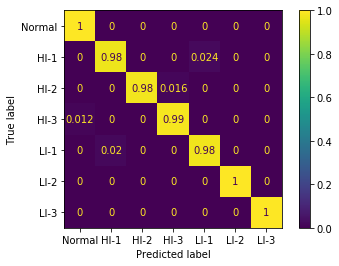

Rodada: 11 - seed: 1818

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       0.93      0.96      0.95        73
        HI-2       1.00      0.99      0.99        69
        HI-3       1.00      1.00      1.00        83
        LI-1       0.96      0.95      0.96        81
        LI-2       1.00      1.00      1.00        77
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.98       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.98      0.98      0.98       519



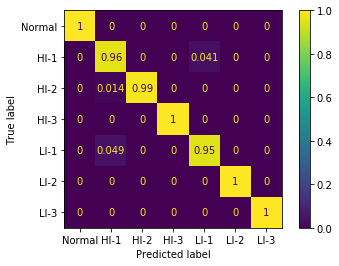

Rodada: 12 - seed: 4298

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        76
        HI-1       0.92      0.93      0.92        85
        HI-2       0.99      0.99      0.99        70
        HI-3       1.00      0.99      0.99        73
        LI-1       0.91      0.91      0.91        74
        LI-2       1.00      1.00      1.00        67
        LI-3       1.00      1.00      1.00        74

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



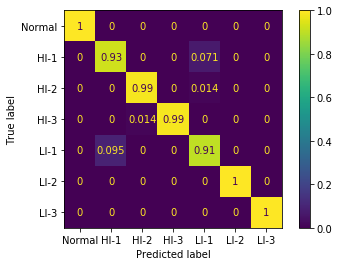

Rodada: 13 - seed: 3945

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        65
        HI-1       0.96      0.90      0.93        84
        HI-2       0.99      0.97      0.98        79
        HI-3       1.00      0.97      0.99        77
        LI-1       0.87      0.96      0.91        74
        LI-2       1.00      1.00      1.00        68
        LI-3       1.00      1.00      1.00        72

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



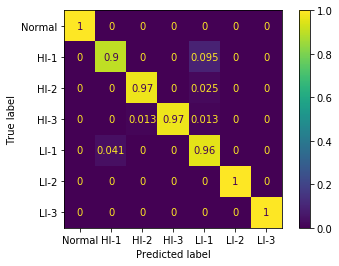

Rodada: 14 - seed: 4858

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        63
        HI-1       0.91      0.96      0.93        67
        HI-2       0.98      0.98      0.98        62
        HI-3       1.00      0.99      0.99        79
        LI-1       0.96      0.93      0.95        86
        LI-2       0.99      1.00      0.99        84
        LI-3       1.00      1.00      1.00        78

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



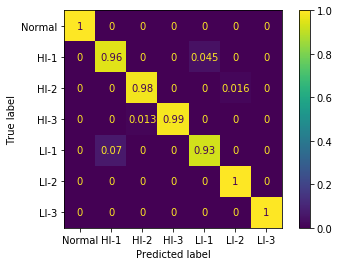

Rodada: 15 - seed: 3023

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        78
        HI-1       0.99      0.96      0.97        75
        HI-2       1.00      0.99      0.99        84
        HI-3       1.00      0.99      0.99        77
        LI-1       0.96      0.99      0.97        68
        LI-2       0.99      1.00      0.99        71
        LI-3       1.00      1.00      1.00        66

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



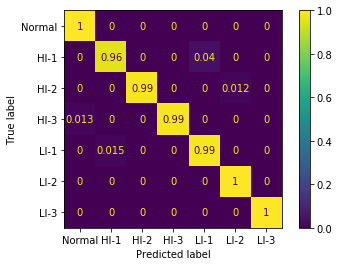

Rodada: 16 - seed: 6042

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99        74
        HI-1       0.92      0.92      0.92        76
        HI-2       0.96      0.99      0.97        77
        HI-3       1.00      1.00      1.00        67
        LI-1       0.92      0.94      0.93        78
        LI-2       1.00      0.97      0.99        76
        LI-3       1.00      1.00      1.00        71

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



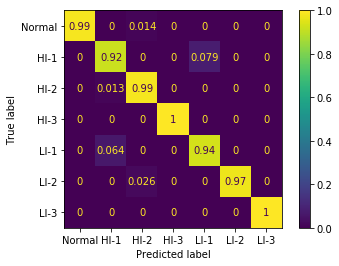

Rodada: 17 - seed: 4260

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        74
        HI-1       0.89      0.98      0.94        66
        HI-2       0.98      0.98      0.98        85
        HI-3       0.99      0.96      0.97        81
        LI-1       0.96      0.90      0.93        78
        LI-2       1.00      1.00      1.00        64
        LI-3       1.00      1.00      1.00        71

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



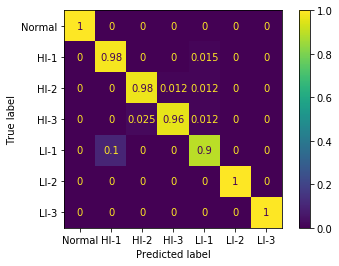

Rodada: 18 - seed: 772

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        58
        HI-1       0.93      0.97      0.95        70
        HI-2       0.99      0.97      0.98        74
        HI-3       0.99      0.99      0.99        86
        LI-1       0.97      0.95      0.96        82
        LI-2       1.00      1.00      1.00        75
        LI-3       1.00      1.00      1.00        74

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



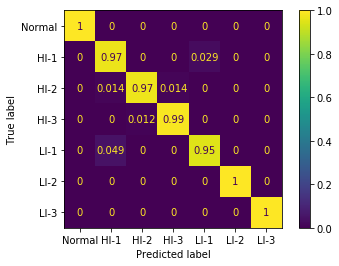

Rodada: 19 - seed: 1010

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        66
        HI-1       0.94      0.99      0.96        74
        HI-2       1.00      0.97      0.99        69
        HI-3       1.00      1.00      1.00        70
        LI-1       0.98      0.94      0.96        85
        LI-2       0.99      1.00      0.99        79
        LI-3       1.00      1.00      1.00        76

    accuracy                           0.98       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.98      0.98      0.98       519



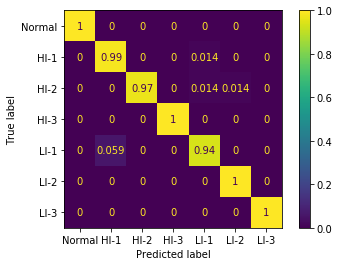

Rodada: 20 - seed: 3662

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        77
        HI-1       0.97      0.97      0.97        80
        HI-2       1.00      0.99      0.99        71
        HI-3       1.00      1.00      1.00        76
        LI-1       0.96      0.97      0.96        68
        LI-2       1.00      1.00      1.00        79
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



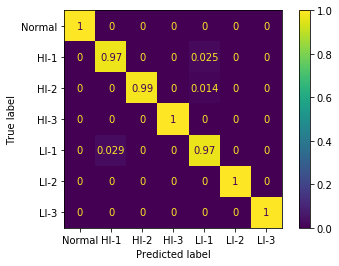

Rodada: 21 - seed: 7907

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        75
        HI-1       0.98      0.98      0.98        84
        HI-2       1.00      1.00      1.00        68
        HI-3       1.00      1.00      1.00        76
        LI-1       0.97      0.97      0.97        77
        LI-2       1.00      1.00      1.00        69
        LI-3       1.00      1.00      1.00        70

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



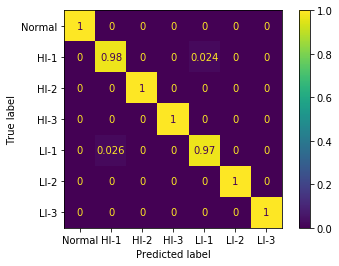

Rodada: 22 - seed: 5949

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        68
        HI-1       0.97      0.97      0.97        71
        HI-2       1.00      0.96      0.98        73
        HI-3       0.99      0.99      0.99        69
        LI-1       0.97      0.99      0.98        86
        LI-2       1.00      1.00      1.00        77
        LI-3       1.00      1.00      1.00        75

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



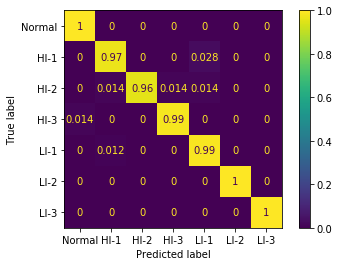

Rodada: 23 - seed: 5826

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        79
        HI-1       0.93      0.96      0.94        79
        HI-2       0.99      0.99      0.99        82
        HI-3       1.00      0.97      0.99        73
        LI-1       0.94      0.91      0.93        69
        LI-2       0.99      1.00      0.99        68
        LI-3       1.00      0.99      0.99        69

    accuracy                           0.97       519
   macro avg       0.98      0.97      0.97       519
weighted avg       0.98      0.97      0.97       519



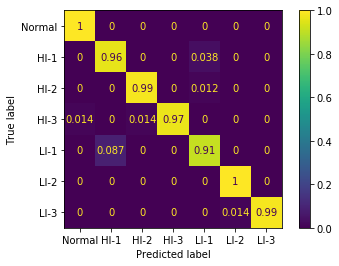

Rodada: 24 - seed: 7527

              precision    recall  f1-score   support

      Normal       0.97      1.00      0.99        66
        HI-1       0.96      0.96      0.96        73
        HI-2       0.97      0.97      0.97        68
        HI-3       1.00      0.94      0.97        70
        LI-1       0.95      0.96      0.96        85
        LI-2       0.99      1.00      0.99        78
        LI-3       1.00      1.00      1.00        79

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



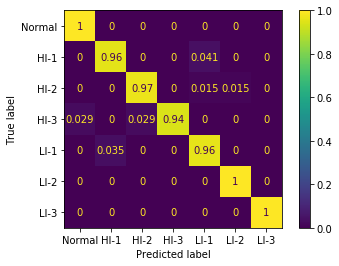

Rodada: 25 - seed: 873

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        81
        HI-1       0.99      0.96      0.97        73
        HI-2       1.00      0.97      0.99        76
        HI-3       1.00      0.99      0.99        77
        LI-1       0.93      1.00      0.96        68
        LI-2       1.00      1.00      1.00        77
        LI-3       1.00      1.00      1.00        67

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



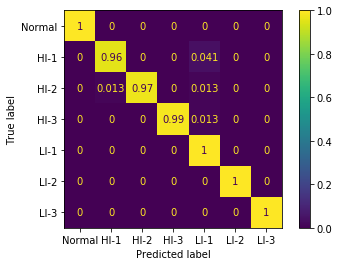

Rodada: 26 - seed: 5471

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        57
        HI-1       0.94      0.93      0.93        83
        HI-2       0.99      0.99      0.99        81
        HI-3       1.00      0.96      0.98        69
        LI-1       0.90      0.95      0.92        76
        LI-2       1.00      1.00      1.00        72
        LI-3       1.00      1.00      1.00        81

    accuracy                           0.97       519
   macro avg       0.98      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



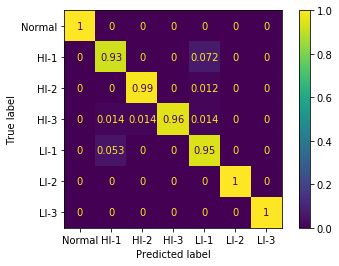

Rodada: 27 - seed: 6811

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        84
        HI-1       0.93      0.96      0.94        80
        HI-2       1.00      1.00      1.00        71
        HI-3       1.00      1.00      1.00        60
        LI-1       0.96      0.92      0.94        77
        LI-2       1.00      1.00      1.00        68
        LI-3       1.00      1.00      1.00        79

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



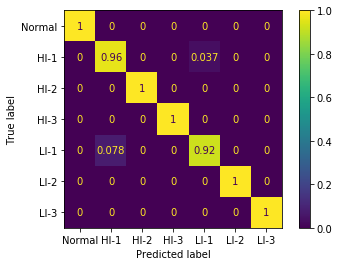

Rodada: 28 - seed: 5389

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        75
        HI-1       0.98      0.97      0.97        88
        HI-2       1.00      0.97      0.98        67
        HI-3       1.00      0.99      0.99        76
        LI-1       0.93      0.98      0.95        86
        LI-2       1.00      1.00      1.00        62
        LI-3       1.00      1.00      1.00        65

    accuracy                           0.98       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.98      0.98       519



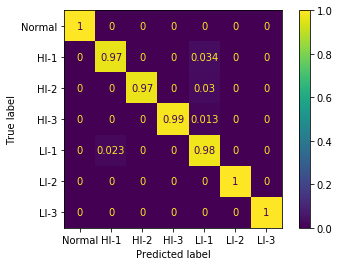

Rodada: 29 - seed: 2138

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       0.96      0.99      0.97        68
        HI-2       1.00      0.98      0.99        81
        HI-3       0.99      1.00      0.99        82
        LI-1       0.99      0.96      0.98        82
        LI-2       0.99      1.00      0.99        66
        LI-3       1.00      1.00      1.00        72

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



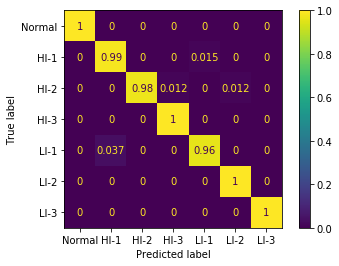

In [3]:
TARGET_LABELS = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

random_seeds = np.random.randint(0, 8000, 30)
print(f'seeds: {random_seeds}')

fluxo_df = pd.read_csv('./csvs/fs20.csv')
y = fluxo_df.pop('target').values
X = fluxo_df.values

acc_scores = []
freq_scores_df = []
confusion_matrices = []

for rodada, seed in enumerate(random_seeds):
    # Distribuindo os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Instanciando e treinando classificador
    classifier = make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(n_neighbors=1)
    ).fit(X_train, y_train)

    # Realizando predição
    y_pred = classifier.predict(X_test)

    # Adicionando resultados à respectiva lista
    acc_scores.append(
        classifier.score(X_test, y_test))

    freq_scores_df.append(
        acuracia_por_frequencia(
            frequence=X_test[:, -1],
            y_pred=y_pred,
            y_true=y_test,
            rodada=rodada))

    confusion_matrices.append(
        confusion_matrix(
            y_pred=y_pred,
            y_true=y_test,
            normalize='true'))

    # Exibindo resultados
    print(f'Rodada: {rodada} - seed: {seed}\n')

    print(classification_report(y_test, y_pred, target_names=TARGET_LABELS))
    
    plot_confusion_matrix(
        estimator=classifier,
        X=X_test,
        y_true=y_test,
        normalize='true',
        display_labels=TARGET_LABELS
    )
    plt.show()

## Matriz de confusão média

[[9.99549550e-01 0.00000000e+00 4.50450450e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.59289217e-01 0.00000000e+00 0.00000000e+00
  4.07107825e-02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.68360109e-03 9.80425094e-01 3.14692294e-03
  9.34115925e-03 4.40322239e-03 0.00000000e+00]
 [3.63957830e-03 4.83091787e-04 6.13266110e-03 9.86251645e-01
  3.49302332e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.85989944e-02 0.00000000e+00 0.00000000e+00
  9.51401006e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.77192982e-04 0.00000000e+00
  0.00000000e+00 9.99122807e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.83091787e-04 9.99516908e-01]]


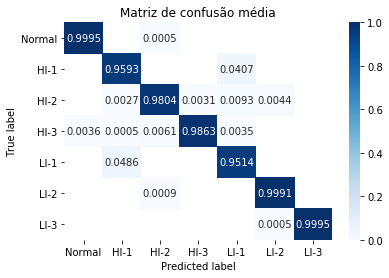

[[0.00242575 0.         0.00242575 0.         0.         0.
  0.        ]
 [0.         0.02292316 0.         0.         0.02292316 0.
  0.        ]
 [0.         0.00537364 0.012816   0.00573358 0.00991415 0.00917516
  0.        ]
 [0.00708404 0.00260153 0.00819128 0.01313318 0.00580105 0.
  0.        ]
 [0.         0.02674233 0.         0.         0.02674233 0.
  0.        ]
 [0.         0.         0.00472383 0.         0.         0.00472383
  0.        ]
 [0.         0.         0.         0.         0.         0.00260153
  0.00260153]]


[Text(33.0, 0.5, 'True label'),
 Text(0.5, 15.0, 'Predicted label'),
 Text(0.5, 1, 'Desvio padrão da matriz de confusão')]

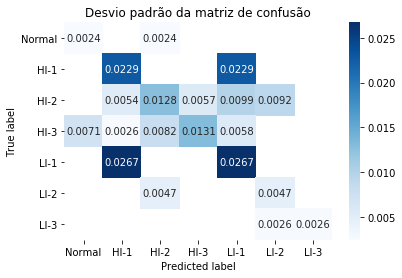

In [4]:
confusion_matrix_mean = np.mean(confusion_matrices, axis=0)
confusion_matrix_std = np.std(confusion_matrices, axis=0)

print(confusion_matrix_mean)
sns.heatmap(
    data=confusion_matrix_mean,
    cmap='Blues',
    vmin=0,
    vmax=1,
    annot=True,
    fmt='.4f',
    mask=confusion_matrix_mean == 0,
    xticklabels=TARGET_LABELS,
    yticklabels=TARGET_LABELS
    ).set(
        title='Matriz de confusão média',
        xlabel='Predicted label',
        ylabel='True label')

plt.show()

print(confusion_matrix_std)
sns.heatmap(
    data=confusion_matrix_std,
    cmap='Blues',
    annot=True,
    fmt='.4f',
    mask=confusion_matrix_std == 0,
    xticklabels=TARGET_LABELS,
    yticklabels=TARGET_LABELS
    ).set(
        title='Desvio padrão da matriz de confusão',
        xlabel='Predicted label',
        ylabel='True label')

## Acurácias gerais

count    30.000000
mean      0.981631
std       0.006631
min       0.969171
25%       0.976879
50%       0.982659
75%       0.986513
max       0.992293
Name: Acurácia, dtype: float64


Acurácia
0.978805
0.986513
0.982659
0.986513
0.984586
0.976879
0.969171
0.980732
0.988439
0.982659


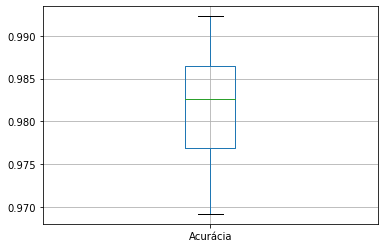

In [5]:
acc_s = pd.Series(data=acc_scores, name='Acurácia')

acc_s.to_frame().boxplot()

print(acc_s.describe())

acc_s.to_frame().style.hide_index().background_gradient(cmap='Blues')

## Acurácias e distribuição de amostras por frequência

In [6]:
freq_df = pd.concat(freq_scores_df, ignore_index=True)

acc_columns = [col for col in freq_df.columns if 'acc' in col]
sup_columns = [col for col in freq_df.columns if 'support' in col]

freq_accs = freq_df[acc_columns]
freq_sups = freq_df[sup_columns]

freq_accs.style.hide_index()

freq_30.0_acc,freq_35.0_acc,freq_40.0_acc,freq_45.0_acc,freq_50.0_acc,freq_55.0_acc,freq_60.0_acc
1.000000,1.000000,0.887500,1.000000,1.000000,0.975904,1.000000
0.971014,1.000000,0.986842,1.000000,1.000000,0.978261,0.969697
0.984615,1.000000,0.973684,1.000000,0.986842,0.977528,0.961538
1.000000,1.000000,0.961039,1.000000,1.000000,0.987342,0.961538
0.974359,1.000000,0.945205,1.000000,0.985507,1.000000,0.984615
0.975309,1.000000,0.943662,0.983051,0.988235,0.976744,0.971014
0.967742,0.972222,0.925000,1.000000,1.000000,0.975309,0.945946
1.000000,1.000000,0.911392,0.984127,0.984127,1.000000,0.985075
1.000000,1.000000,0.957746,1.000000,1.000000,0.988235,0.972973
0.987342,1.000000,0.948718,1.000000,1.000000,0.972973,0.974359


,freq_30.0_acc,freq_35.0_acc,freq_40.0_acc,freq_45.0_acc,freq_50.0_acc,freq_55.0_acc,freq_60.0_acc
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.984659,0.997803,0.946586,0.997465,0.992757,0.983241,0.972014
std,0.013754,0.007048,0.029697,0.005826,0.009763,0.012092,0.016184
min,0.950820,0.972222,0.886076,0.982456,0.961039,0.949367,0.940299
25%,0.974596,1.000000,0.930606,1.000000,0.986885,0.976114,0.961538
50%,0.984845,1.000000,0.948043,1.000000,1.000000,0.986299,0.972412
75%,1.000000,1.000000,0.970996,1.000000,1.000000,0.988200,0.985399
max,1.000000,1.000000,0.986842,1.000000,1.000000,1.000000,1.000000


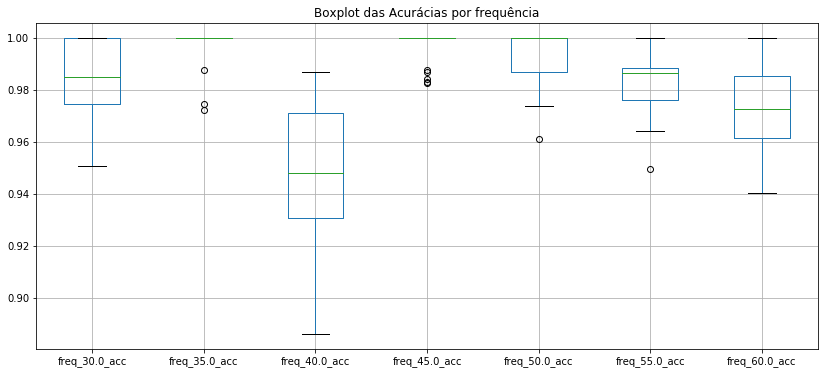

In [7]:
freq_accs.boxplot(figsize=(14, 6)).set(title='Boxplot das Acurácias por frequência')

freq_accs.describe()

In [8]:
freq_sups.style.hide_index()

freq_30.0_support,freq_35.0_support,freq_40.0_support,freq_45.0_support,freq_50.0_support,freq_55.0_support,freq_60.0_support
78,76,80,75,60,83,67
69,74,76,65,77,92,66
65,72,76,63,76,89,78
69,75,77,62,79,79,78
78,78,73,67,69,89,65
81,68,71,59,85,86,69
62,72,80,92,58,81,74
77,88,79,63,63,82,67
68,78,71,67,76,85,74
79,74,78,64,72,74,78


,freq_30.0_support,freq_35.0_support,freq_40.0_support,freq_45.0_support,freq_50.0_support,freq_55.0_support,freq_60.0_support
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,70.366667,74.566667,76.100000,69.566667,73.033333,80.600000,74.766667
std,6.520436,5.893792,6.661003,8.459573,7.388170,6.240027,6.991045
min,58.000000,65.000000,56.000000,57.000000,58.000000,69.000000,63.000000
25%,65.500000,70.000000,71.500000,63.250000,69.500000,75.000000,69.000000
50%,69.500000,74.000000,77.000000,67.500000,75.500000,80.500000,74.500000
75%,75.750000,78.000000,79.750000,74.500000,77.750000,85.000000,79.000000
max,85.000000,88.000000,89.000000,92.000000,85.000000,92.000000,91.000000


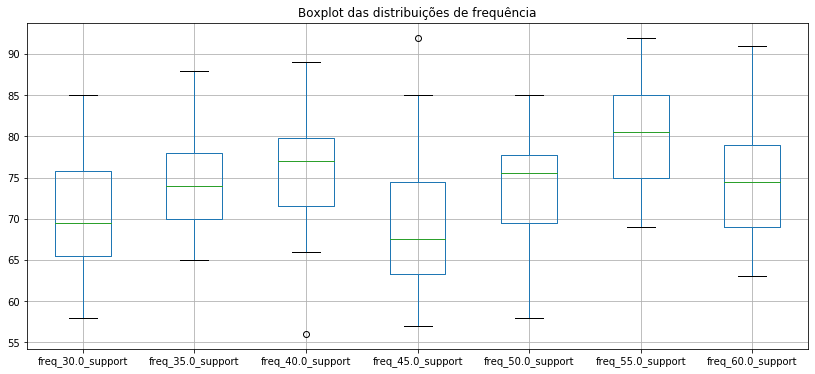

In [9]:
freq_sups.boxplot(figsize=(14, 6)).set(title='Boxplot das distribuições de frequência')

freq_sups.describe()